This version of the example uses lmfit (https://lmfit.github.io/lmfit-py/) with an explicitly defined objective function

In [111]:
import numpy as np
from lmfit import minimize, Parameters, fit_report
import matplotlib.pyplot as plt

In [112]:
# Generate example data according to an exponential PDF
np.random.seed(42)
lambda_=3.14159   # lambda is a keyword, so use lambda_ instead!
x_true = np.random.exponential(scale=lambda_, size=1000)

# Create histogram of the data
range=(0.0,4.0)
counts, bin_edges = np.histogram(x_true, bins=50, range=range, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errs = np.sqrt(counts)

<ErrorbarContainer object of 3 artists>

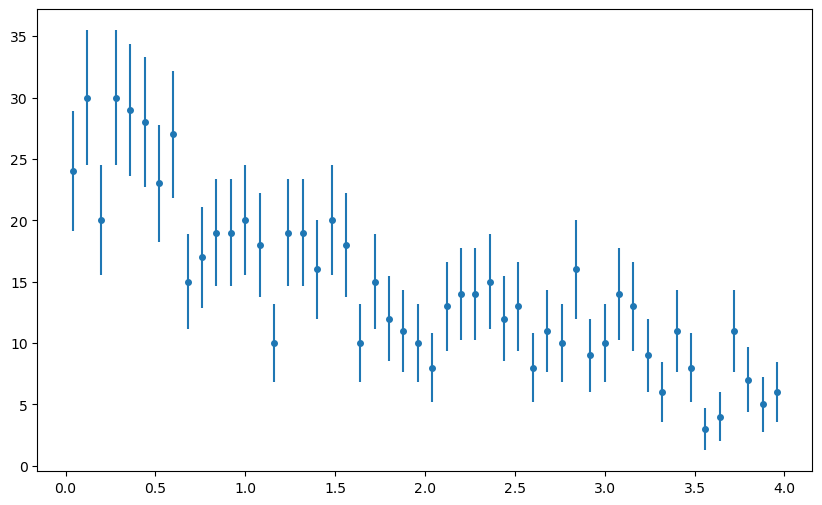

In [113]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4)

In [114]:
from scipy.special import gammaln
def expo(x, scale, lambda_):
    return scale * np.exp(-x / lambda_)

def nll_objective(params, bin_edges, data):
    scale = params['scale']
    lambda_ = params['lambda_']
    n=data
    model = expo(bin_edges, scale, lambda_)
    model = np.clip(model, 1e-10, None)  # prevent log(0)
    nll = model - data * np.log(model)+gammaln(n+1)
    
    return np.sqrt(2*nll)
params = Parameters()
params.add('scale', value=np.max(counts), min=0)
params.add('lambda_', value=2, min=0, max=3)

Check our guess for the starting parameter values

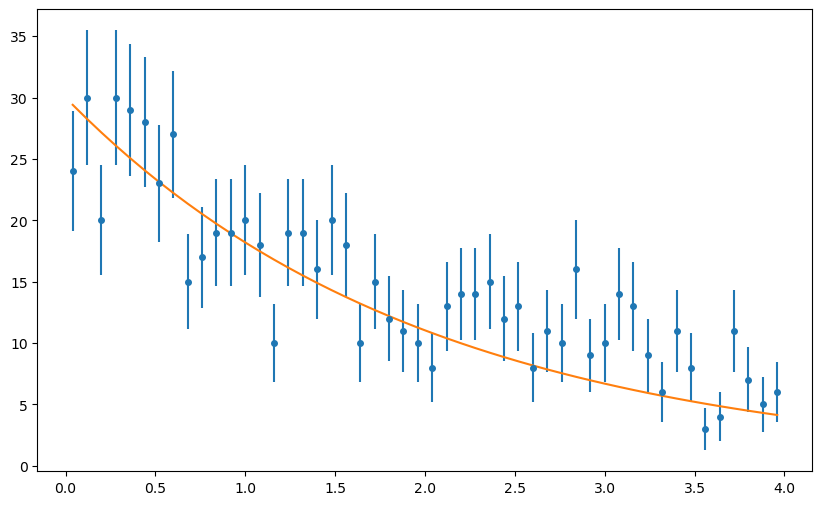

In [115]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4)
plt.plot(bin_centers,expo(bin_centers,params['scale'].value, params['lambda_'].value))

The initial guess for the paraemter values looks pretty good.  Therfore the minimzer should be able to converge to a good minimum.

In [116]:
# Perform the fit
result = minimize(nll_objective, params, args=(bin_centers, counts))

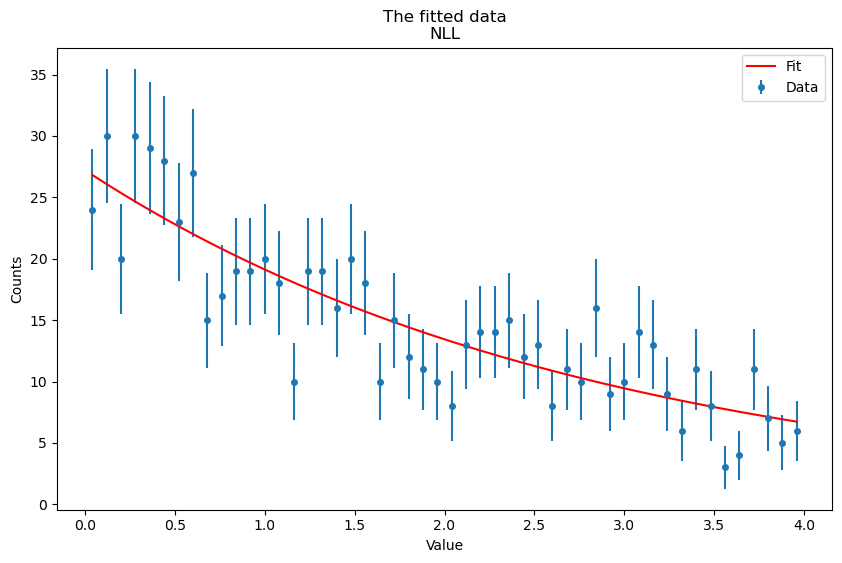

In [117]:
# Calculate the best fit curve
best_fit = expo(bin_centers, result.params['scale'].value, result.params['lambda_'].value)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=np.sqrt(counts), 
             fmt='o', label='Data', markersize=4)
plt.plot(bin_centers, best_fit, 'r-', label='Fit')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.legend()
plt.title('The fitted data\nNLL')

plt.show()

In [118]:
# using the internal fit report
print(f"\nTotal Negative Log-Likelihood = {nll_value:.3f}")
print(f"Number of free parameters = {result.nfree}")


Total Negative Log-Likelihood = 10.001
Number of free parameters = 48
